In [1]:
from threading import Thread, Lock, Condition
from queue import Queue
from random import randint

import numpy as np
from matplotlib import pyplot as plt

from time import sleep

# Ejercicio 1: un productor, dos consumidores, *mutex only*

In [2]:
# Implementando con Lock
class Mutex:
    def __init__(self):
        self.esta_bloqueado = False
        self.lock = Lock()
    
    def bloquear(self):
        self.lock.acquire()
        self.esta_bloqueado = True
    
    def desbloquear(self):
        self.lock.release()
        self.esta_bloqueado = False

In [3]:
class Productor(Thread):
    def __init__(self,buffer,mutex):
        super().__init__()
        self.buffer = buffer
        self.mutex = mutex
        self.esta_despierto = False
        
    def producir(self):
        item = randint(0,101)
        print(f'Productor: Acabo de producir {item}')
        return item
    
    def añadir_al_buffer(self,item):
        self.buffer.put(item)
        print(f'Productor: Agregué {item} al buffer')
    
    def run(self):
        while True:
            self.mutex.bloquear()
            if not self.buffer.full():
                espacio = self.buffer.maxsize - self.buffer.qsize()
                print(f'Productor: Hay espacio para {espacio} item(s)')
                item = self.producir()
                self.añadir_al_buffer(item)
            self.mutex.desbloquear()


In [4]:
class Consumidor(Thread):
    identificador = 1
    def __init__(self,buffer,mutex):
        super().__init__()
        self.buffer = buffer
        self.mutex = mutex
        self.id = Consumidor.identificador
        Consumidor.identificador += 1        
        
    def quitar_del_buffer(self):
        item = self.buffer.get()
        print(f'Consumidor {self.id}: Obtuve {item} del buffer')
        return item
    
    def consumir(self,item):
        print(f'Consumidor {self.id}: Consumí {item}')
    
    def run(self):
        while True:
            self.mutex.bloquear()
            if not self.buffer.empty():
                print(f'Consumidor {self.id}: Hay {self.buffer.qsize()} item(s) por consumir')
                item = self.quitar_del_buffer()
                self.consumir(item)
            self.mutex.desbloquear()



In [ ]:
mutex = Mutex()
buffer = Queue(5) # Tamaño del buffer

p = Productor(buffer,mutex)
c1 = Consumidor(buffer,mutex)
c2 = Consumidor(buffer,mutex)

p.start()
c1.start()
c2.start()

p.join()
c1.join()
c2.join()

Productor: Hay espacio para 5 item(s)
Productor: Acabo de producir 15
Productor: Agregué 15 al buffer
Productor: Hay espacio para 4 item(s)
Productor: Acabo de producir 72
Productor: Agregué 72 al buffer
Productor: Hay espacio para 3 item(s)
Productor: Acabo de producir 22
Productor: Agregué 22 al buffer
Productor: Hay espacio para 2 item(s)
Productor: Acabo de producir 49
Productor: Agregué 49 al buffer
Productor: Hay espacio para 1 item(s)
Productor: Acabo de producir 17
Productor: Agregué 17 al buffer
Consumidor 1: Hay 5 item(s) por consumir
Consumidor 1: Obtuve 15 del buffer
Consumidor 1: Consumí 15
Consumidor 1: Hay 4 item(s) por consumir
Consumidor 1: Obtuve 72 del buffer
Consumidor 1: Consumí 72
Consumidor 1: Hay 3 item(s) por consumir
Consumidor 1: Obtuve 22 del buffer
Consumidor 1: Consumí 22
Consumidor 1: Hay 2 item(s) por consumir
Consumidor 1: Obtuve 49 del buffer
Consumidor 1: Consumí 49
Consumidor 1: Hay 1 item(s) por consumir
Consumidor 1: Obtuve 17 del buffer
Consumidor

Consumidor 1: Hay 5 item(s) por consumir
Consumidor 1: Obtuve 54 del buffer
Consumidor 1: Consumí 54
Consumidor 1: Hay 4 item(s) por consumir
Consumidor 1: Obtuve 83 del buffer
Consumidor 1: Consumí 83
Consumidor 1: Hay 3 item(s) por consumir
Consumidor 1: Obtuve 41 del buffer
Consumidor 1: Consumí 41
Consumidor 1: Hay 2 item(s) por consumir
Consumidor 1: Obtuve 47 del buffer
Consumidor 1: Consumí 47
Consumidor 1: Hay 1 item(s) por consumir
Consumidor 1: Obtuve 99 del buffer
Consumidor 1: Consumí 99
Productor: Hay espacio para 5 item(s)
Productor: Acabo de producir 97
Productor: Agregué 97 al buffer
Productor: Hay espacio para 4 item(s)
Productor: Acabo de producir 81
Productor: Agregué 81 al buffer
Productor: Hay espacio para 3 item(s)
Productor: Acabo de producir 35
Productor: Agregué 35 al buffer
Productor: Hay espacio para 2 item(s)
Productor: Acabo de producir 31
Productor: Agregué 31 al buffer
Productor: Hay espacio para 1 item(s)
Productor: Acabo de producir 16
Productor: Agregu

Consumidor 1: Hay 5 item(s) por consumir
Consumidor 1: Obtuve 98 del buffer
Consumidor 1: Consumí 98
Consumidor 1: Hay 4 item(s) por consumir
Consumidor 1: Obtuve 67 del buffer
Consumidor 1: Consumí 67
Consumidor 1: Hay 3 item(s) por consumir
Consumidor 1: Obtuve 48 del buffer
Consumidor 1: Consumí 48
Consumidor 1: Hay 2 item(s) por consumir
Consumidor 1: Obtuve 89 del buffer
Consumidor 1: Consumí 89
Consumidor 1: Hay 1 item(s) por consumir
Consumidor 1: Obtuve 46 del buffer
Consumidor 1: Consumí 46
Productor: Hay espacio para 5 item(s)
Productor: Acabo de producir 65
Productor: Agregué 65 al buffer
Productor: Hay espacio para 4 item(s)
Productor: Acabo de producir 3
Productor: Agregué 3 al buffer
Productor: Hay espacio para 3 item(s)
Productor: Acabo de producir 48
Productor: Agregué 48 al buffer
Productor: Hay espacio para 2 item(s)
Productor: Acabo de producir 65
Productor: Agregué 65 al buffer
Productor: Hay espacio para 1 item(s)
Productor: Acabo de producir 45
Productor: Agregué 

Consumidor 1: Hay 5 item(s) por consumir
Consumidor 1: Obtuve 99 del buffer
Consumidor 1: Consumí 99
Consumidor 1: Hay 4 item(s) por consumir
Consumidor 1: Obtuve 12 del buffer
Consumidor 1: Consumí 12
Consumidor 1: Hay 3 item(s) por consumir
Consumidor 1: Obtuve 66 del buffer
Consumidor 1: Consumí 66
Productor: Hay espacio para 3 item(s)
Productor: Acabo de producir 0
Productor: Agregué 0 al buffer
Productor: Hay espacio para 2 item(s)
Productor: Acabo de producir 30
Productor: Agregué 30 al buffer
Productor: Hay espacio para 1 item(s)
Productor: Acabo de producir 97
Productor: Agregué 97 al buffer
Consumidor 2: Hay 5 item(s) por consumir
Consumidor 2: Obtuve 38 del buffer
Consumidor 2: Consumí 38
Consumidor 2: Hay 4 item(s) por consumir
Consumidor 2: Obtuve 77 del buffer
Consumidor 2: Consumí 77
Consumidor 2: Hay 3 item(s) por consumir
Consumidor 2: Obtuve 0 del buffer
Consumidor 2: Consumí 0
Consumidor 2: Hay 2 item(s) por consumir
Consumidor 2: Obtuve 30 del buffer
Consumidor 2: Co

Productor: Hay espacio para 5 item(s)
Productor: Acabo de producir 75
Productor: Agregué 75 al buffer
Productor: Hay espacio para 4 item(s)
Productor: Acabo de producir 29
Productor: Agregué 29 al buffer
Productor: Hay espacio para 3 item(s)
Productor: Acabo de producir 86
Productor: Agregué 86 al buffer
Productor: Hay espacio para 2 item(s)
Productor: Acabo de producir 57
Productor: Agregué 57 al buffer
Productor: Hay espacio para 1 item(s)
Productor: Acabo de producir 89
Productor: Agregué 89 al buffer
Consumidor 1: Hay 5 item(s) por consumir
Consumidor 1: Obtuve 75 del buffer
Consumidor 1: Consumí 75
Consumidor 1: Hay 4 item(s) por consumir
Consumidor 1: Obtuve 29 del buffer
Consumidor 1: Consumí 29
Consumidor 1: Hay 3 item(s) por consumir
Consumidor 1: Obtuve 86 del buffer
Consumidor 1: Consumí 86
Consumidor 1: Hay 2 item(s) por consumir
Consumidor 1: Obtuve 57 del buffer
Consumidor 1: Consumí 57
Consumidor 1: Hay 1 item(s) por consumir
Consumidor 1: Obtuve 89 del buffer
Consumidor

Consumidor 2: Hay 5 item(s) por consumir
Consumidor 2: Obtuve 14 del buffer
Consumidor 2: Consumí 14
Consumidor 2: Hay 4 item(s) por consumir
Consumidor 2: Obtuve 15 del buffer
Consumidor 2: Consumí 15
Consumidor 2: Hay 3 item(s) por consumir
Consumidor 2: Obtuve 67 del buffer
Consumidor 2: Consumí 67
Consumidor 2: Hay 2 item(s) por consumir
Consumidor 2: Obtuve 50 del buffer
Consumidor 2: Consumí 50
Consumidor 2: Hay 1 item(s) por consumir
Consumidor 2: Obtuve 42 del buffer
Consumidor 2: Consumí 42
Productor: Hay espacio para 5 item(s)
Productor: Acabo de producir 94
Productor: Agregué 94 al buffer
Productor: Hay espacio para 4 item(s)
Productor: Acabo de producir 75
Productor: Agregué 75 al buffer
Productor: Hay espacio para 3 item(s)
Productor: Acabo de producir 41
Productor: Agregué 41 al buffer
Productor: Hay espacio para 2 item(s)
Productor: Acabo de producir 93
Productor: Agregué 93 al buffer
Productor: Hay espacio para 1 item(s)
Productor: Acabo de producir 29
Productor: Agregu

Productor: Agregué 50 al buffer
Consumidor 2: Hay 1 item(s) por consumir
Consumidor 2: Obtuve 50 del buffer
Consumidor 2: Consumí 50
Productor: Hay espacio para 5 item(s)
Productor: Acabo de producir 86
Productor: Agregué 86 al buffer
Productor: Hay espacio para 4 item(s)
Productor: Acabo de producir 55
Productor: Agregué 55 al buffer
Productor: Hay espacio para 3 item(s)
Productor: Acabo de producir 69
Productor: Agregué 69 al buffer
Productor: Hay espacio para 2 item(s)
Productor: Acabo de producir 5
Productor: Agregué 5 al buffer
Productor: Hay espacio para 1 item(s)
Productor: Acabo de producir 44
Productor: Agregué 44 al buffer
Consumidor 1: Hay 5 item(s) por consumir
Consumidor 1: Obtuve 86 del buffer
Consumidor 1: Consumí 86
Consumidor 1: Hay 4 item(s) por consumir
Consumidor 1: Obtuve 55 del buffer
Consumidor 1: Consumí 55
Consumidor 1: Hay 3 item(s) por consumir
Consumidor 1: Obtuve 69 del buffer
Consumidor 1: Consumí 69
Consumidor 1: Hay 2 item(s) por consumir
Consumidor 1: O

Consumidor 1: Hay 5 item(s) por consumir
Consumidor 1: Obtuve 26 del buffer
Consumidor 1: Consumí 26
Consumidor 1: Hay 4 item(s) por consumir
Consumidor 1: Obtuve 78 del buffer
Consumidor 1: Consumí 78
Consumidor 1: Hay 3 item(s) por consumir
Consumidor 1: Obtuve 1 del buffer
Consumidor 1: Consumí 1
Consumidor 1: Hay 2 item(s) por consumir
Consumidor 1: Obtuve 78 del buffer
Consumidor 1: Consumí 78
Consumidor 1: Hay 1 item(s) por consumir
Consumidor 1: Obtuve 68 del buffer
Consumidor 1: Consumí 68
Productor: Hay espacio para 5 item(s)
Productor: Acabo de producir 37
Productor: Agregué 37 al buffer
Productor: Hay espacio para 4 item(s)
Productor: Acabo de producir 62
Productor: Agregué 62 al buffer
Productor: Hay espacio para 3 item(s)
Productor: Acabo de producir 73
Productor: Agregué 73 al buffer
Productor: Hay espacio para 2 item(s)
Productor: Acabo de producir 55
Productor: Agregué 55 al buffer
Productor: Hay espacio para 1 item(s)
Productor: Acabo de producir 25
Productor: Agregué 

Productor: Hay espacio para 5 item(s)
Productor: Acabo de producir 64
Productor: Agregué 64 al buffer
Productor: Hay espacio para 4 item(s)
Productor: Acabo de producir 79
Productor: Agregué 79 al buffer
Productor: Hay espacio para 3 item(s)
Productor: Acabo de producir 44
Productor: Agregué 44 al buffer
Productor: Hay espacio para 2 item(s)
Productor: Acabo de producir 63
Productor: Agregué 63 al buffer
Productor: Hay espacio para 1 item(s)
Productor: Acabo de producir 85
Productor: Agregué 85 al buffer
Consumidor 2: Hay 5 item(s) por consumir
Consumidor 2: Obtuve 64 del buffer
Consumidor 2: Consumí 64
Consumidor 2: Hay 4 item(s) por consumir
Consumidor 2: Obtuve 79 del buffer
Consumidor 2: Consumí 79
Consumidor 2: Hay 3 item(s) por consumir
Consumidor 2: Obtuve 44 del buffer
Consumidor 2: Consumí 44
Consumidor 2: Hay 2 item(s) por consumir
Consumidor 2: Obtuve 63 del buffer
Consumidor 2: Consumí 63
Consumidor 2: Hay 1 item(s) por consumir
Consumidor 2: Obtuve 85 del buffer
Consumidor

Productor: Hay espacio para 5 item(s)
Productor: Acabo de producir 101
Productor: Agregué 101 al buffer
Consumidor 1: Hay 1 item(s) por consumir
Consumidor 1: Obtuve 101 del buffer
Consumidor 1: Consumí 101
Productor: Hay espacio para 5 item(s)
Productor: Acabo de producir 61
Productor: Agregué 61 al buffer
Consumidor 1: Hay 1 item(s) por consumir
Consumidor 1: Obtuve 61 del buffer
Consumidor 1: Consumí 61
Productor: Hay espacio para 5 item(s)
Productor: Acabo de producir 37
Productor: Agregué 37 al buffer
Productor: Hay espacio para 4 item(s)
Productor: Acabo de producir 31
Productor: Agregué 31 al buffer
Productor: Hay espacio para 3 item(s)
Productor: Acabo de producir 73
Productor: Agregué 73 al buffer
Productor: Hay espacio para 2 item(s)
Productor: Acabo de producir 47
Productor: Agregué 47 al buffer
Productor: Hay espacio para 1 item(s)
Productor: Acabo de producir 13
Productor: Agregué 13 al buffer
Consumidor 2: Hay 5 item(s) por consumir
Consumidor 2: Obtuve 37 del buffer
Cons

Productor: Hay espacio para 5 item(s)
Productor: Acabo de producir 22
Productor: Agregué 22 al buffer
Productor: Hay espacio para 4 item(s)
Productor: Acabo de producir 27
Productor: Agregué 27 al buffer
Productor: Hay espacio para 3 item(s)
Productor: Acabo de producir 50
Productor: Agregué 50 al buffer
Productor: Hay espacio para 2 item(s)
Productor: Acabo de producir 62
Productor: Agregué 62 al buffer
Productor: Hay espacio para 1 item(s)
Productor: Acabo de producir 68
Productor: Agregué 68 al buffer
Consumidor 1: Hay 5 item(s) por consumir
Consumidor 1: Obtuve 22 del buffer
Consumidor 1: Consumí 22
Consumidor 1: Hay 4 item(s) por consumir
Consumidor 1: Obtuve 27 del buffer
Consumidor 1: Consumí 27
Consumidor 1: Hay 3 item(s) por consumir
Consumidor 1: Obtuve 50 del buffer
Consumidor 1: Consumí 50
Consumidor 1: Hay 2 item(s) por consumir
Consumidor 1: Obtuve 62 del buffer
Consumidor 1: Consumí 62
Consumidor 1: Hay 1 item(s) por consumir
Consumidor 1: Obtuve 68 del buffer
Consumidor

Productor: Hay espacio para 5 item(s)
Productor: Acabo de producir 87
Productor: Agregué 87 al buffer
Productor: Hay espacio para 4 item(s)
Productor: Acabo de producir 24
Productor: Agregué 24 al buffer
Productor: Hay espacio para 3 item(s)
Productor: Acabo de producir 62
Productor: Agregué 62 al buffer
Productor: Hay espacio para 2 item(s)
Productor: Acabo de producir 25
Productor: Agregué 25 al buffer
Productor: Hay espacio para 1 item(s)
Productor: Acabo de producir 93
Productor: Agregué 93 al buffer
Consumidor 2: Hay 5 item(s) por consumir
Consumidor 2: Obtuve 87 del buffer
Consumidor 2: Consumí 87
Consumidor 2: Hay 4 item(s) por consumir
Consumidor 2: Obtuve 24 del buffer
Consumidor 2: Consumí 24
Consumidor 2: Hay 3 item(s) por consumir
Consumidor 2: Obtuve 62 del buffer
Consumidor 2: Consumí 62
Consumidor 2: Hay 2 item(s) por consumir
Consumidor 2: Obtuve 25 del buffer
Consumidor 2: Consumí 25
Consumidor 2: Hay 1 item(s) por consumir
Consumidor 2: Obtuve 93 del buffer
Consumidor

Productor: Hay espacio para 5 item(s)
Productor: Acabo de producir 53
Productor: Agregué 53 al buffer
Productor: Hay espacio para 4 item(s)
Productor: Acabo de producir 0
Productor: Agregué 0 al buffer
Productor: Hay espacio para 3 item(s)
Productor: Acabo de producir 90
Productor: Agregué 90 al buffer
Productor: Hay espacio para 2 item(s)
Productor: Acabo de producir 12
Productor: Agregué 12 al buffer
Productor: Hay espacio para 1 item(s)
Productor: Acabo de producir 91
Productor: Agregué 91 al buffer
Consumidor 1: Hay 5 item(s) por consumir
Consumidor 1: Obtuve 53 del buffer
Consumidor 1: Consumí 53
Consumidor 1: Hay 4 item(s) por consumir
Consumidor 1: Obtuve 0 del buffer
Consumidor 1: Consumí 0
Consumidor 1: Hay 3 item(s) por consumir
Consumidor 1: Obtuve 90 del buffer
Consumidor 1: Consumí 90
Consumidor 1: Hay 2 item(s) por consumir
Consumidor 1: Obtuve 12 del buffer
Consumidor 1: Consumí 12
Consumidor 2: Hay 1 item(s) por consumir
Consumidor 2: Obtuve 91 del buffer
Consumidor 2: 

# Ejercicio 2: Composición de funciones

In [3]:
def g(ans,mutex):
    mutex.bloquear()
    x = ans.pop()
    y = 3*x**2 + 2*x - 1
    ans.append(y)
    mutex.desbloquear()

In [4]:
def f(ans,mutex):
    mutex.bloquear()
    x = ans.pop()
    y = np.sin(x)+np.cos(x)
    ans.append(y)
    mutex.desbloquear()

In [5]:
x = np.arange(-100,100,0.25)
ans = [] # Lista que comunica a los thread
ans.append(x)
mutex = Mutex()

ft = Thread(target=f,args=(ans,mutex))
gt = Thread(target=g,args=(ans,mutex))

ft.start()
gt.start()

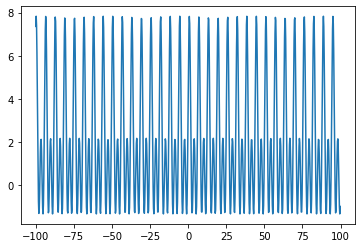

In [6]:
plt.plot(x,ans.pop())

# Ejercicio 3

Proceso de fabricación de dulces
* inicio:
    + una máquina que provee chicles
    + una máquina que provee una unidad de polvo para cubrir el chicle
   
Procesos
1. máquina que recibe el chicle y el polvo la cual cubre el chicle con el polvo 
2. máquina que recibe el bolichicle y lo envuelve
3. máquina que toma 10 bolichicles  envueltos para envasarlos en una bolsa 
-------------
Definiendo algunos nombres
* Proceso 1 : Empolvadora (chicle, polvo)->bolichicle
* Proceso 2 : Envolvedora (bolichicle) -> bolichicle envuelto
* Proceso 3 : Embalador (10 bolichicles envueltos) -> bolsa de bolichicles envueltos

Adicionalmente
* Proceso 4 : productor_chicles
* Proceso 5 : productor_polvo

In [7]:
class Empolvadora(Thread):
    def __init__(self,insumos,condrecurso,condproducto,tiempo_produccion=0):
        self.insumos = insumos
        self.condicion_recursos = condrecurso
        self.condicion_producto = condproducto
        self.t = tiempo_produccion
        self.encendido = False
        super().__init__()
        print("Empolvadora creada")
    
    def apagar(self):
        self.encendido = False
    
    def encender(self):
        self.encendido = True

    def hay_recursos(self):
        return self.insumos['chicles'] > 0 and self.insumos['polvo'] > 0
    
    def produce(self):
        with self.condicion_recursos:
            self.condicion_recursos.wait_for(self.hay_recursos)
            sleep(self.t)
            self.insumos['chicles'] -= 1
            self.insumos['polvo'] -= 1
        
        with self.condicion_producto:
            self.insumos['bolichicles'] += 1
            self.condicion_producto.notify()
    
    def run(self):
        self.encender()
        print(f"Empolvadora está encendida: {self.encendido}")
        while self.encendido:
            self.produce()
            print(f'Empolvadora: Se tomó un chicle y una unidad de polvo para hacer un bolichicle')

In [8]:
class Envolvedora(Thread):
    def __init__(self,insumos,condrecurso,condproducto,tiempo_produccion=0):
        self.insumos = insumos
        self.condicion_recursos = condrecurso
        self.condicion_producto = condproducto
        self.t = tiempo_produccion
        self.encendido = False
        super().__init__()
        print("Envolvedora creada")

    
    def apagar(self):
        self.encendido = False
    
    def hay_recursos(self):
        return self.insumos['bolichicles'] > 0
    
    def produce(self):
        with self.condicion_recursos:
            self.condicion_recursos.wait_for(self.hay_recursos)
            sleep(self.t)
            self.insumos['bolichicles'] -= 1

        with self.condicion_producto:
            self.insumos['bolichicles_env'] += 1
            self.condicion_producto.notify()
            
    def run(self):
        self.encendido = True
        print(f"Envolvedora encendida: {self.encendido}")
        while self.encendido:
            self.produce()
            print(f'Envolvedora: Se tomó un bolichicle para envolverlo')

In [9]:
class Embalador(Thread):
    def __init__(self,insumos,condvariable,tiempo_produccion=0):
        self.insumos = insumos
        self.condicion_recursos = condvariable
        self.t = tiempo_produccion
        self.encendido = False
        super().__init__()
        print("Embalador creado")

    def apagar(self):
        self.encendido = False
    
    def hay_recursos(self):
        return self.insumos['bolichicles_env'] >= 10
    
    def produce(self):
        with self.condicion_recursos:
            self.condicion_recursos.wait_for(self.hay_recursos)
            sleep(self.t)
            self.insumos['bolichicles_env'] -= 10
            self.insumos['bolsa_bolichicles'] += 1
    
    def run(self):
        self.encendido = True
        print(f"Embalador encendido: {self.encendido}")
        while self.encendido:
            self.produce()
            print(f'Embalador: Se tomó 10 bolichicles envuelos para envasarlos')

In [10]:
class Productor_chicles(Thread):
    def __init__(self,insumos,condvariable,tiempo_produccion=0):
        self.insumos = insumos
        self.cond_recursos = condvariable
        self.t = tiempo_produccion
        self.encendido = False
        super().__init__()
        print("P_chicles creado")
    
    def apagar(self):
        self.encendido = False
    
    def produce(self):
        with self.cond_recursos:
            sleep(self.t)
            self.insumos['chicles'] += 1
            self.cond_recursos.notify()
    
    def run(self):
        self.encendido = True
        print(f"P_chicles encendido:{self.encendido}")
        while self.encendido:
            self.produce()
            print("P_chicles: Se produjo un chicle")

In [11]:
class Productor_polvo(Thread):
    def __init__(self,insumos,condvariable,tiempo_produccion=0):
        self.insumos = insumos
        self.cond_recursos = condvariable
        self.t = tiempo_produccion
        self.encendido = False
        super().__init__()
        print("P_polvo creado")
    
    def apagar(self):
        self.encendido = False
    
    def produce(self):
        with self.cond_recursos:
            sleep(self.t)
            self.insumos['polvo'] += 1
            self.cond_recursos.notify()
        
    def run(self):
        self.encendido = True
        print(f"P_polvo encendido:{self.encendido}")
        while self.encendido:
            self.produce()
            print("P_polvo: Se produjo una unidad de polvo")

In [ ]:
insumos = {'chicles':0,'polvo':0, 'bolichicles':0, 'bolichicles_env':0, 'bolsa_bolichicles':0}

cond_chicheYpolvo_boli = Condition()
cond_boli_env = Condition()
cond_env_bolsa = Condition()

p4 = Productor_chicles(insumos,cond_chicheYpolvo_boli,3)
p5 = Productor_polvo(insumos,cond_chicheYpolvo_boli,3)
p1 = Empolvadora(insumos,cond_chicheYpolvo_boli,cond_boli_env,1)
p2 = Envolvedora(insumos,cond_boli_env,cond_env_bolsa,1)
p3 = Embalador(insumos,cond_env_bolsa,1)

p4.start()
p5.start()
p1.start()
p2.start()
p3.start()

while True:
    print(insumos)
    sleep(10)

P_chicles creado
P_polvo creado
Empolvadora creada
Envolvedora creada
Embalador creado
P_chicles encendido:True
P_polvo encendido:True
Empolvadora está encendida: True
Envolvedora encendida: True
Embalador encendido: True{'chicles': 0, 'polvo': 0, 'bolichicles': 0, 'bolichicles_env': 0, 'bolsa_bolichicles': 0}

P_chicles: Se produjo un chicle
P_polvo: Se produjo una unidad de polvo
Empolvadora: Se tomó un chicle y una unidad de polvo para hacer un bolichicle
Envolvedora: Se tomó un bolichicle para envolverlo
{'chicles': 0, 'polvo': 0, 'bolichicles': 0, 'bolichicles_env': 1, 'bolsa_bolichicles': 0}
P_chicles: Se produjo un chicle
P_polvo: Se produjo una unidad de polvo
Empolvadora: Se tomó un chicle y una unidad de polvo para hacer un bolichicle
Envolvedora: Se tomó un bolichicle para envolverlo
P_chicles: Se produjo un chicle
{'chicles': 1, 'polvo': 0, 'bolichicles': 0, 'bolichicles_env': 2, 'bolsa_bolichicles': 0}
P_polvo: Se produjo una unidad de polvo
Empolvadora: Se tomó un chicle 